## Text cleaning and Preprocessing

In [ ]:
pip install spacy

In [3]:
import pandas as pd
import numpy as np
import spacy

In [4]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv',encoding= 'latin-1')

In [6]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [7]:
df['sentiment'].value_counts()

sentiment
0    2000
1    2000
Name: count, dtype: int64

### Word Counts

In [8]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [9]:
df.sample(5)

,twitts,sentiment,word_counts
2266,Sitting in french watching ratatouille.,1,5
2863,@mileycyrus I love your photo,1,5
2211,just painted my nails a beautiful orange and p...,1,15
3534,@fingwindmills Better the chocolate crackers t...,1,11
3265,YAY!!! internet is back on my laptop,1,7


In [10]:
df['word_counts'].max()

32

In [11]:
df['word_counts'].min()

1

In [12]:
df['word_counts'] == 1

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: word_counts, Length: 4000, dtype: bool

In [13]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


### Character Counts

In [14]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [15]:
char_counts('I am wide awake')

12

In [16]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [17]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
3711,I NEED a Looong Vacation after I graduate! Whe...,1,14,62
2978,@RealitynTails You are welcome for the #ff sho...,1,9,44
2472,Chilling with the ladies!!!! Beautiful out!!,1,6,39
2477,@sivonclaire The fact that you said Title of S...,1,22,100
1935,"@mediatemple And for GS customers, nothing?",0,6,38


### Average Word Length

In [18]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [19]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len
183,Photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000
1920,i want to call to selena but i dont live in usa,0,12,36,3.000000
328,Is depressed he didn't find the charger first,0,8,38,4.750000
3731,@toriilovesmcfly :0 im making some now so ill ...,1,23,89,3.869565
1911,I miss Dave Chappelle... (via @beautyfulashley...,0,8,47,5.875000


### Stop Words Count

In [20]:
print(stopwords)

{'was', "'s", 'among', 'ca', 'now', 'somewhere', "'m", 'with', 'same', 'whole', 'on', 'sometime', 'until', 'those', 'above', 're', 'full', 'whose', 'becomes', 'once', 'using', 'four', 'whereafter', 'during', 'can', 'various', 'via', 'him', 'they', 'sixty', 'became', 'otherwise', '‘ll', "'ve", 'most', 'used', 'two', 'enough', 'under', 'hence', 'must', 'she', 'because', 'did', 'whence', 'since', '‘m', '‘re', 'see', 'toward', 'back', 'thereafter', 'together', 'ours', 'almost', 'than', 'never', 'from', 'this', 'out', 'twelve', 'five', 'per', 'am', 'hers', 'afterwards', 'move', "'ll", 'their', 'been', 'meanwhile', 'already', 'perhaps', 'will', 'done', 'unless', 'else', 'who', 'what', '’s', 'after', 'a', 'doing', 'then', '‘s', 'would', 'whereas', 'without', 'whoever', 'these', 'at', 'do', 'somehow', 'also', 'bottom', 'former', 'myself', 'eight', 'hereupon', 'had', 'first', 'less', 'only', 'someone', 'be', 'before', 'forty', 'anywhere', 'not', 'his', 'herein', 'whatever', 'thence', 'again', '

In [21]:
len(stopwords)

326

In [22]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

### #Hashtags and @Mentions Count

In [23]:
# [t for t in x.split() if t.starstwith('#')]

In [24]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [25]:
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [26]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
1234,@IanHanlon Me and Scobz goal is to get a celeb...,0,28,98,3.500000,18,0,1
736,@MsCeMontgomery UGH!!,0,2,20,10.000000,0,0,1
1915,I think I am going to be sick this effing back...,0,13,43,3.307692,6,0,0
275,@RoxanneAmelia who's the love of your life? el...,0,18,87,4.833333,8,0,1
3236,"wow, getting a tad sleepy so ima hit the head ...",1,14,54,3.857143,3,0,0


### Numeric Digits Count

In [27]:
x = 'this is 1 and 2'
x.split()

['this', 'is', '1', 'and', '2']

In [28]:
x.split()[4].isdigit()

True

In [29]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [30]:
df['numeric_count'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))

In [31]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count
1714,@carole_hicks Too far for me to go for lunch,0,9,36,4.000000,5,0,1,0
2693,@JodieGiese yeah- there was definitely a pillo...,1,8,47,5.875000,3,0,1,0
3285,"What a day! Pikes mkt, bainbridge island, undg...",1,20,116,5.800000,3,0,0,0
331,"@adianti thankss tyyy... sedih, soalnya baju2 ...",0,9,58,6.444444,0,0,1,0
1575,@tequilasam lol - you wouldnt bluddy sunbath...,0,13,68,5.230769,5,0,1,0


### Upper Case Words Count

In [32]:
x = "I GOT THE JOB"
y = "I got the job"

In [33]:
[t for t in x.split() if t.isupper()]

['I', 'GOT', 'THE', 'JOB']

In [34]:
[t for t in y.split() if t.isupper()]

['I']

In [35]:
df['upper_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [36]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count
3486,@Blackrush Must have had a busy Sunday,1,7,32,4.571429,3,0,1,0,0
1384,Too Emotional right noww,0,4,21,5.250000,0,0,0,0,0
1324,ARGHHHH...have misplaced my latest draft of th...,0,17,87,5.117647,6,0,0,0,1
784,just doing college work,0,4,20,5.000000,2,0,0,0,0
125,@MasterAwesome 23 almost 24 im an old lady,0,8,35,4.375000,2,0,1,2,0


In [37]:
df.iloc[483]['twitts']

"Hear it's raining in SF  Oh well, we will probably go the the Eagle for beer bust anyway."

### Lower Case Conversion

In [38]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [39]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count
678,been teaching when all i want to do is sleep ...,0,18,77,4.277778,8,0,0,0,1
2005,"didnt get to see up, but was pretty satisfied ...",1,17,78,4.588235,8,0,0,0,0
3676,tonight was a good night,1,5,20,4.000000,2,0,0,0,0
1985,@clickwindrepeat she has a bald spot on her ba...,0,21,100,4.761905,11,0,2,0,0
3636,@texasheartland hang in there! tomorrow will p...,1,9,56,6.222222,3,0,1,0,0


## Contraction to Expansion

In [40]:
# x = "don't shouldn't, i'll "  # do not should not i will

In [41]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [42]:
import contractions

In [43]:
custom_contractions = {
"a’ight": "alright",
"ain’t" : "i am not",
"amn’t": "am not",
"arencha" : "are not you",
"aren’t": "are not",
"’bout": "about",
"boy's": "boy has",
"can’t": "cannot",
"cap’n": "captain",
"’cause" : "because",
"cuz": "because",
"’cept": "except",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve" :	"could not have",
"cuppa" : "cup of",
"daren’t" : "dare not",
"daresn’t" : "dare not",
"dasn’t" : "dare not",
"didn’t": "did not",
"doesn't": "does not",
"don’t": "do not",
"dunno"	: "do not know",
"d’ye" : "do you",
"d’ya": "did you",
"e’en":	"even",
"e’er": "ever",
"’em": "them",
"everybody’s": "everybody is",
"everyone’s": "everyone is",
"everything's": "everything is",
"finna": "fixing to",
"fo’c’sle": "forecastle",
"’gainst" : "against",
"g’day":"good day",
"gimme": "give me",
"girl's": "girl is",
"giv’n": "given",
"gi’z": "give us",
"gonna":"going to",
"gon’t": "go not",
"gotta": "got to",
"guy's": "guy is",
"hadn’t" :	"had not",
"had’ve": "had have",
"hasn’t": "has not",
"haven’t":	"have not",
"he’d": "he had",
"he’d": "he would",
"he'll": "he will",
"helluva": "hell of a",
"yes'nt":" yes not",
"he’s ": "he is",
"here’s": "here is",
"how’d": "how did",
"howdy": "how do you do",
"how’ll": "how shall",
"how’re": "how are",
"how’s": "how is",
"i’d":	"I would",
"i’d’ve": "I would have",
"i’d’nt": "I would not",
"i’d’nt’ve": "I would not have",
"if’n": "If and when",
"i’ll": "I will",
"i’m": "I am",
"imma": "I am going to",
"i’mo": "I am going to",
"innit": "isn’t it",
"ion": "I do not",
"i’ve":	"I have",
"isn’t":" is not",
"it’d": "it would",
"it’ll": "it will",
"it’s": "it is",
"idunno": "I don’t know",
"kinda": "kind of",
"let’s": "let us",
"loven’t": "love not",
"ma’am": "madam",
"mayn’t": "may not",
"may’ve": "may have",
"methinks": "I think",
"mightn’t": "might not",
"might’ve": "might have",
"mine’s": "mine is",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"must’ve": "must have",
"’neath": "beneath",
"needn’t": "need not",
"nal": "and all",
"ne’er": "never",
"o’er":	"over",
"ol’": "old",
"ought’ve": "ought have",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"’round": "around",
"’s": "is",
"shan’t": "shall not",
"she’d": "she would",
"she’ll": "she will",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"somebody’s" : "somebody has",
"someone’s": "someone is",
"something’s": "something is",
"so’re": "so are",
"so’s": "so is",
"so’ve": "so have",
"that’ll": "that will",
"that’re": "that are",
"that’s": "that is",
"that’d": "that would",
"there’d": "there would",
"there’ll": "there will",
"there’re": "there are",
"there’s": "there is",
"these’re": "these are",
"these’ve": "these have",
"they’d": "they would",
"they’d've": "they would have",
"they’ll": "they will",
"they’re": "they are",
"they’ve": "they have",
"this’s": "this is",
"those’re": "those are",
"those’ve": "those have",
"’thout": "without",
"’til": "until",
"’tis": "it is",
"to’ve": "to have",
"tryna": "trying to",
"’twas": "it was",
"’tween": "between",
"’twere": "it were",
"w’all": "we all",
"w’at": "we at",
"ur": "your",
"wanna": "want to",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"whatcha": 	"what are you",
"what’d": "what did",
"what’ll": "what will",
"what’re": 	"what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"where’d": "where did",
"where’ll": "where will",
"where’re": "where are",
"where’s": 	"where is",
"where’ve": "where have",
"which’d": "which would",
"which’ll": "which will",
"which’re": "which are",
"which’s": 	"which is",
"which’ve": "which have",
"who’d": "who would",
"who’d’ve": "who would have",
"who’ll": "who will",
"who’re": "who are",
"who’s": "who is",
"who’ve": "who have",
"why’d": "why did",
"why’re": "why are",
"why’s": "why is",
"willn’t": 	"will not",
"won’t": "will not",
"wonnot": "will not",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’ain’t ":	"you are not",
"y’all": "you all",
"y’all’d’ve": "you all would have",
"y’all’dn't’ve":"you all would not have",
"y’all’re": "you all are",
"y’all’ren’t": 	"you all are not",
"y’at": "you at",
"yes’m": "yes madam",
"yever": "have you ever?",
"y’know": "you know",
"yessir": "yes sir",
"you’d": "you would",
"you’ll": "you will",
"you’re": "you are",
"you’ve": "you have",
"when’d": "when did"
}

In [44]:

import contractions

x = "y'all know I wouldn't forget ur birthday y'know"

def cont_to_exp(x):
    return contractions.fix(x)

result = cont_to_exp(x)
print(result)

you all know I would not forget you are birthday y'know


In [45]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

25.8 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count
664,ohno it is raining hope it does not affect th...,0,10,46,4.600000,2,0,0,0,1
1989,my tongue is burny...,0,4,18,4.500000,2,0,0,0,0
2196,had a good night out last night after work. lo...,1,24,114,4.750000,11,0,0,0,0
3117,adios twitter bugs,1,3,16,5.333333,0,0,0,0,0
2243,please keep voting for @chriscuzzy &amp; @tomf...,1,19,120,6.315789,6,0,3,0,0


### Count and Remove Emails

In [47]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [48]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [49]:
import re

In [50]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [51]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [52]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x))

In [53]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [54]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


Remove the emails

In [55]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please  '

In [56]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

### Count and Remove URLS

In [57]:
x = 'hi, thanks for watching. for more videos, visit https://youtube.com/xaimli or github.com/xxy'

In [58]:
re.findall(r'(http|https|ftp|ssh|)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/xaimli')]

In [59]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh|)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [60]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,url_flags
3769,is with her sister arianne http://plurk.com/p...,1,6,46,7.666667,2,0,0,0,0,[],0,1
2685,@ddlovato http://twitpic.com/3lwfk - have fun ...,1,24,106,4.416667,4,0,1,1,1,[],0,1
2964,@mileycyrus http://twitpic.com/6shtr - please ...,1,14,101,7.214286,4,0,1,0,4,[],0,1
1185,loves and miss donny.... where is he? http://...,0,7,56,8.000000,1,0,0,0,0,[],0,1
1680,oh my. woke up with theeee illest headache o...,0,16,84,5.250000,5,0,0,0,1,[],0,1


In [61]:
re.sub(r'(http|https|ftp|ssh|)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x)

'hi, thanks for watching. for more videos, visit  or github.com/xxy'

In [62]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh|)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x))

In [63]:
df.sample(10)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,url_flags
174,ohhh 2 write bak 2 people you hav 2 put their ...,0,32,106,3.312500,10,0,0,4,0,[],0,0
2704,the road trip with my honey has commenced to ...,1,13,52,4.000000,6,0,0,0,0,[],0,0
667,i hate this cold i have caught.,0,6,24,4.000000,1,0,0,0,1,[],0,0
592,day off of work tomorrow... who knew kids get ...,0,23,104,4.521739,8,0,0,0,0,[],0,0
124,"fuck off, rafa. broken serving for the set?",0,8,36,4.500000,2,0,0,0,0,[],0,0
2802,@nickcarver modesto! that is my home town,1,6,35,5.833333,1,0,1,0,0,[],0,0
3593,@tommcfly sorry you are having a bad day.. yo...,1,18,78,4.333333,6,0,1,0,0,[],0,0
3284,up was good. i liked it a lot. very heart warm...,1,18,70,3.888889,5,0,0,0,3,[],0,0
586,"@dawnmay7 amen, i love house. all of my fav s...",0,15,67,4.466667,3,0,1,0,1,[],0,0
2603,"@graceywoohoo ohhh, haha. i just like do not k...",1,12,61,5.083333,2,0,1,0,1,[],0,0


### Remove RT

In [64]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,7,0,0,0,2,[],0,0
59,@paulmccourt do not know what sky you are look...,0,15,80,5.333333,3,0,1,0,0,[],0,0
75,i am back home in belfast i am realli tired t...,0,22,84,3.818182,9,0,0,0,1,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,5,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,4.166667,1,0,0,0,0,[],0,0
3919,earned her cpr &amp; first aid certifications!,1,7,40,5.714286,1,0,0,0,1,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,4.608696,10,0,1,0,0,[],0,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,87,4.142857,7,0,0,2,1,[],0,0


In [65]:
x = 'rt @username: hello hi'

In [66]:
re.sub(r'\brt\b', '', x).strip()

'@username: hello hi'

In [67]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

### Special Character or Punctuation Removal

In [68]:
df.sample(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,url_flags
2003,nap time. all this pettiness has worn me out,1,9,36,4.000000,5,0,0,0,0,[],0,0
3321,or even a walk,1,4,11,2.750000,3,0,0,0,0,[],0,0
2746,just voted for the kids choice awards!,1,7,32,4.571429,3,0,0,0,0,[],0,0


In [69]:
x = '@mayoryoung hey man, i had fun being on your s...'

In [70]:
re.sub(r'[^\w ]+', '',x)

'mayoryoung hey man i had fun being on your s'

In [71]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'[^\w ]+', '',x))

### Remove Multiple Spaces


In [72]:
x = ' hi      how have you been'

In [73]:
' '.join(x.split())

'hi how have you been'

In [74]:
df['twitts'] = df['twitts'].apply(lambda x : ' '.join(x.split()))

### Remove HTML tags

In [75]:
!pip install beautifulsoup4

In [76]:
from bs4 import BeautifulSoup

In [83]:
x = '<html><h1> thanks for watching </h1><html>'

In [78]:
# normal method

# x.replace('<html><h1>', '').replace('</h1>/<html', '')

In [ ]:
pip install lxml

In [84]:
BeautifulSoup(x, 'lxml').get_text().strip()

'thanks for watching'

In [85]:
%%time
df['twitts'] = df['twitts'].apply(lambda x : BeautifulSoup(x, 'lxml').get_text().strip())

CPU times: total: 250 ms
Wall time: 977 ms


### Remove Accented Chars

In [86]:
x = 'áccénted ímprÓper Úndérstándíng Ñoñe'

In [87]:
import unicodedata

In [88]:
def remove_accented_char(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [89]:
remove_accented_char(x)

'accented imprOper Understanding None'

In [90]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_char(x) )

### Remove Stop Words

In [93]:
x = 'this is a stop word'

In [92]:
' '.join([t for t in x.split() if t not in stopwords])

'stop word'

In [94]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x : ' '.join([t for t in x.split() if t not in stopwords]))

In [95]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,url_flags,twitts_no_stop
260,is it sad that i am totally bummed out that qu...,0,23,90,3.913043,15,0,0,0,0,[],0,0,sad totally bummed quotmediumquot moving cbs s...
2623,raquelm2 okay great i cannot wait i am really ...,1,25,112,4.480000,9,0,2,1,0,[],0,0,raquelm2 okay great wait looking forward disne...
1019,i lost 2 followerswhat did i do wrong,0,8,35,4.375000,4,0,0,1,0,[],0,0,lost 2 followerswhat wrong
1755,i miss him argh,0,4,12,3.000000,1,0,0,0,2,[],0,0,miss argh
3764,on vacation on the flight to india,1,7,40,5.714286,2,0,0,0,0,[],0,0,vacation flight india


### Convert Word into its Root Base or Form(Lemmatization)

In [ ]:
!python -m spacy download en_core_web_sm

In [100]:
nlp = spacy.load('en_core_web_sm')

In [102]:
x = 'I am looking out of the window in memory of the times when we bought chocolates for fun'

In [105]:
def convert_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma =='be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [106]:
convert_to_base(x)

'I am look out of the window in memory of the time when we buy chocolate for fun'

In [107]:
df['twitts'] = df['twitts'].apply(lambda x : convert_to_base(x) )

### Common Words Removal( Most Frequent Words)

In [108]:
x = 'this is okay this bye'

In [110]:
# join the series

text = ' '.join(df['twitts'])

In [111]:
len(text)

274181

In [112]:
# get the number of words
text = text.split()

In [113]:
len(text)

54474

In [116]:
# convert text datato Pandas Series
freq_words = pd.Series(text).value_counts()

In [117]:
# get the top 20 most frequently occuring words
top20 = freq_words[:20]
top20

I       2969
to      1513
the     1316
is       963
a        957
you      950
not      907
my       825
it       737
and      709
have     691
do       621
am       608
in       571
for      521
of       495
go       472
that     458
get      451
on       427
Name: count, dtype: int64

In [120]:
# remove the top20 words

df['twitts'] = df['twitts'].apply(lambda x : ' '.join([t for t in x.split() if t not in top20]))

In [121]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_count,emails,emails_count,url_flags,twitts_no_stop
2866,andreaj27 course we will what friend,1,9,47,5.222222,3,0,1,0,0,[],0,0,andreaj27 course friends
2076,86 degree at 9pmi too love california d,1,8,41,5.125000,2,0,0,1,1,[],0,0,86 degrees 9pmi love california d
537,krrptd1 yeah but feel like share no one else a...,0,19,80,4.210526,9,0,2,0,1,[],0,0,krrptd1 yeah felt like sharing ahem crucifixxu...
3762,esmeeworld how small by way thank ticket was t...,1,21,82,3.904762,8,0,1,0,1,[],0,0,esmeeworld small way thanks tickets friend jonas
1409,want life work massage but can due slip disc b...,0,23,111,4.826087,9,0,0,0,1,[],0,0,wanting lifes work massage slipped disc baseme...


### Rare Words Removal

In [123]:
# the least occuring words
rare20 = freq_words.tail(20)

In [124]:
df['twitts'] = df['twitts'].apply(lambda x : ' '.join([t for t in x.split() if t not in rare20]))

### Remove rows with missing values

In [158]:
df.dropna(inplace=True)

### Word Cloud Visualization

In [ ]:
!pip install wordcloud

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
text = ' '.join(df['twitts'])

In [128]:
len(text)

219309

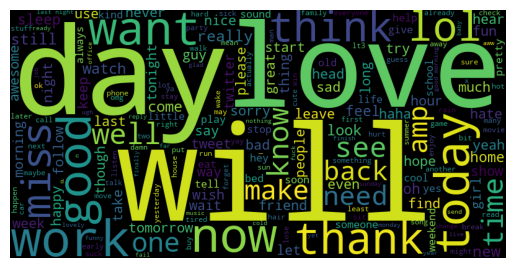

In [129]:
word_cloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Spelling Correction Using TextBlob

In [ ]:
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

In [132]:
from textblob import TextBlob

In [137]:
x = 'it is a graet movie. I wached it twice. I wil wacth it agian'

In [138]:
TextBlob(x).correct()

TextBlob("it is a great movie. I watched it twice. I will watch it again")

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x : TextBlob(x).correct() )

### Tokenization using TextBlob

In [140]:
x = 'stay#tuned for more episodes. Have a great time'

In [141]:
TextBlob(x).words

WordList(['stay', 'tuned', 'for', 'more', 'episodes', 'Have', 'a', 'great', 'time'])

In [143]:
# tokenization with spacy
doc = nlp(x)
for token in doc:
    print(token)

stay#tuned
for
more
episodes
.
Have
a
great
time


### Nouns Detection from a Text Data

In [144]:
x = 'We are pleased to announce the acquisition of Twitter by Elon Musk, the CEO of Tesla'

In [145]:
doc = nlp(x)

In [146]:
for noun in doc.noun_chunks:
    print(noun)

We
the acquisition
Twitter
Elon Musk
the CEO
Tesla


### Language Translation and Detection using TextBlob

In [151]:
txtblob = TextBlob(x)

In [ ]:
txtblob.detect_language()

In [ ]:
txtblob.translate(to='spanish')

### Sentiment Classifier Using TextBlob

In [153]:
from textblob.sentiments import NaiveBayesAnalyzer

In [154]:
x = 'she is in a terrible place, emotionally.'

In [156]:
txb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
txb.sentiment

Sentiment(classification='neg', p_pos=0.4657947823680377, p_neg=0.5342052176319632)

In [81]:
"""
def cont_to_exp(x):
    if type(x) is str:
        for key in custom_contractions:
            value = custom_contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
"""

'\ndef cont_to_exp(x):\n    if type(x) is str:\n        for key in custom_contractions:\n            value = custom_contractions[key]\n            x = x.replace(key, value)\n        return x\n    else:\n        return x\n'

In [82]:
"""
def preprocess_with_custom_dict(text, custom_dict):
    for key, value in custom_dict.items():
        text = text.replace(key, f"{value}_TOKEN")
    return text

def postprocess_with_custom_dict(text, custom_dict):
    for key, value in custom_dict.items():
        text = text.replace(f"{value}_TOKEN", value)
    return text

x = "y'all know I wouldn't forget ur birthday y'know"

# Preprocess: Replace custom contractions with special tokens
x_preprocessed = preprocess_with_custom_dict(x, custom_contractions)

# Use contractions library
x_expanded = contractions.fix(x_preprocessed)

# Postprocess: Replace special tokens with expanded forms
result = postprocess_with_custom_dict(x_expanded, custom_contractions)

print(result)
"""

'\ndef preprocess_with_custom_dict(text, custom_dict):\n    for key, value in custom_dict.items():\n        text = text.replace(key, f"{value}_TOKEN")\n    return text\n\ndef postprocess_with_custom_dict(text, custom_dict):\n    for key, value in custom_dict.items():\n        text = text.replace(f"{value}_TOKEN", value)\n    return text\n\nx = "y\'all know I wouldn\'t forget ur birthday y\'know"\n\n# Preprocess: Replace custom contractions with special tokens\nx_preprocessed = preprocess_with_custom_dict(x, custom_contractions)\n\n# Use contractions library\nx_expanded = contractions.fix(x_preprocessed)\n\n# Postprocess: Replace special tokens with expanded forms\nresult = postprocess_with_custom_dict(x_expanded, custom_contractions)\n\nprint(result)\n'